In [54]:
# Listing 6-1 Importing the data”

import statsmodels.api as sm
data = sm.datasets.co2.load_pandas()

data = data.data

data.head()


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


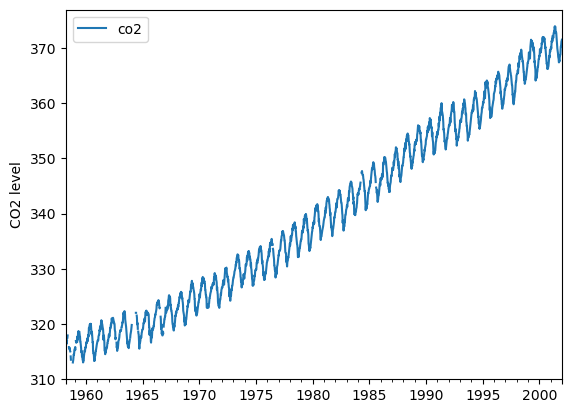

In [55]:
# Listing 6-2 Plotting the data”
import matplotlib.pyplot as plt
ax = data.plot()
ax.set_ylabel('CO2 level')
plt.show()


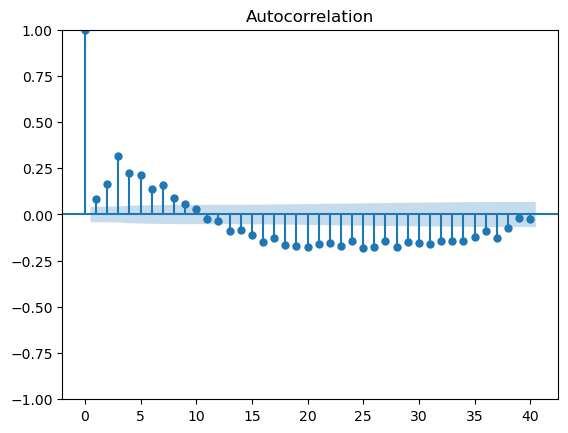

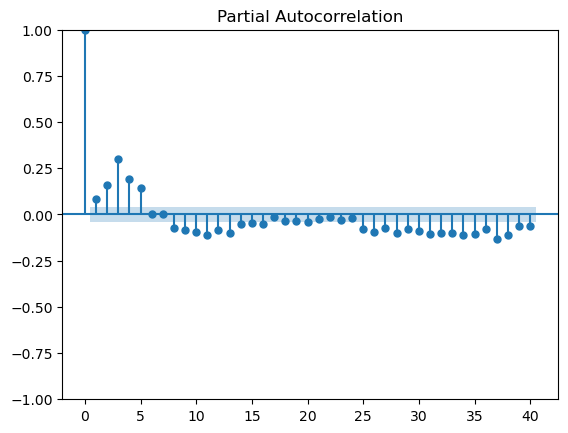

In [56]:
# “Listing 6-3 ACF and PACF plots”

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.diff().dropna(), lags=40)
plot_pacf(data.diff().dropna(), lags=40)
plt.show()

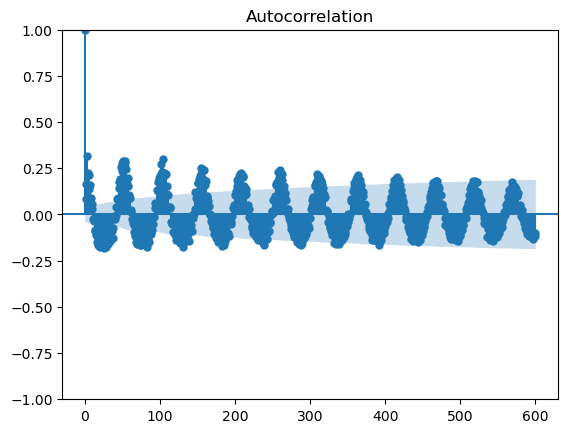

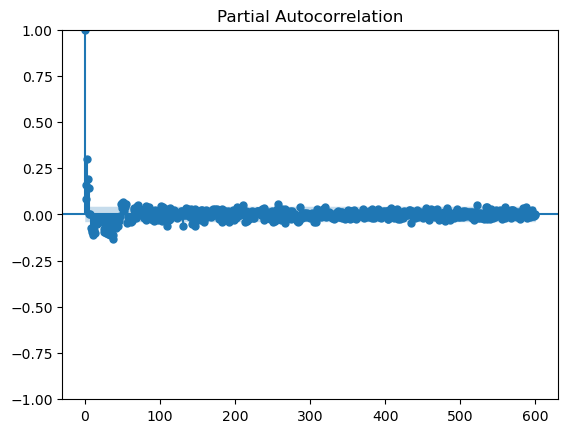

In [6]:
# “Listing 6-4 ACF and PACF plots with more lags”

plot_acf(data.diff().dropna(), lags=600)
plot_pacf(data.diff().dropna(), lags=600)
plt.show()


In [57]:
# Listing 6-5 Hyperparameter tuning”


import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
data_array = data[['co2']].values

avg_errors = []

for p in range(6):
    for q in range(6):
        for i in range(3):
            errors = []
            
            tscv = TimeSeriesSplit(test_size=10)
            
            for train_index, test_index in tscv.split(data_array):
                X_train, X_test = data_array[train_index], data_array[test_index]
                X_test_orig = X_test
                
                fcst = []
                for step in range(10):
                    try:
                        mod = ARIMA(X_train, order=(p,i,q))
                        res = mod.fit()
                        fcst.append(res.forecast(steps=1))
                    except:
                        print('errorred')
                        fcst.append(-9999999.)
                    X_train = np.concatenate((X_train, X_test[0:1,:]))
                    X_test = X_test[1:]
                    
                errors.append(r2_score(X_test_orig, fcst))
            pq_result = [p, i, q, np.mean(errors)]
            print(pq_result)
            avg_errors.append(pq_result)

avg_errors = pd.DataFrame(avg_errors)
avg_errors.columns = ['p', 'i', 'q', 'error']
avg_errors.sort_values('error', ascending=False)



[0, 0, 0, -1710.6765834777293]
[0, 1, 0, 0.6416554176244676]
[0, 2, 0, 0.31328222430845853]
[0, 0, 1, -438.55855697124326]
[0, 1, 1, 0.641535432077733]
[0, 2, 1, 0.6579648109097805]
[0, 0, 2, -134.5103281649689]
[0, 1, 2, 0.6560671248646095]
[0, 2, 2, 0.6888742513442888]
[0, 0, 3, -49.064568625252726]
[0, 1, 3, 0.6842284166552568]
[0, 2, 3, 0.6867178873236879]
[0, 0, 4, -23.16596485133073]
[0, 1, 4, 0.6959913821232961]
[0, 2, 4, 0.6875850071545276]
[0, 0, 5, -11.512780031648974]
[0, 1, 5, 0.7203713814885024]
[0, 2, 5, 0.6853479227186242]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[1, 0, 0, 0.641528490201414]
[1, 1, 0, 0.6419887287693182]
[1, 2, 0, 0.5584579508683444]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[1, 0, 1, 0.641205175232631]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive p

[1, 1, 1, 0.6788163629192507]
[1, 2, 1, 0.6777697300132148]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[1, 0, 2, 0.655696334949001]
[1, 1, 2, 0.7158143194136478]
[1, 2, 2, 0.6862414102547587]
[1, 0, 3, 0.6825999292188049]
[1, 1, 3, 0.7167699893299202]
[1, 2, 3, 0.6890353174635642]
[1, 0, 4, 0.6937232933240509]
[1, 1, 4, 0.7165114198430956]
[1, 2, 4, 0.6928790592183921]
[1, 0, 5, 0.7171344566492889]
[1, 1, 5, 0.713297655538319]
[1, 2, 5, 0.6874479886717321]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[2, 0, 0, 0.641477756682035]
[2, 1, 0, 0.662817487279695]
[2, 2, 0, 0.6321584699276553]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive p

[2, 0, 1, 0.643074967834707]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive p

[2, 1, 1, 0.7009207871008167]
[2, 2, 1, 0.6813587038310962]
[2, 0, 2, 0.712195249438866]
[2, 1, 2, 0.7025196806187768]
[2, 2, 2, 0.6891060319377663]
[2, 0, 3, 0.707707728574871]
[2, 1, 3, 0.723510123727132]
[2, 2, 3, 0.6920436274972653]
[2, 0, 4, 0.7095438608425322]
[2, 1, 4, 0.7217456040944092]
[2, 2, 4, 0.6905699461762513]
[2, 0, 5, 0.7063544266851493]
[2, 1, 5, 0.7252038067932172]
[2, 2, 5, 0.6921019705003377]
[3, 0, 0, 0.6613236511040604]
[3, 1, 0, 0.6856983882635393]
[3, 2, 0, 0.6690638702192361]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[3, 0, 1, 0.6986865932674223]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive p

[3, 1, 1, 0.7060578286858533]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive p

[3, 2, 1, 0.6857525258069881]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive p

[3, 0, 2, 0.6350820641103988]
[3, 1, 2, 0.7161809480853372]
[3, 2, 2, 0.6857176423611411]
[3, 0, 3, 0.7186535933976355]
[3, 1, 3, 0.7112570357803838]
[3, 2, 3, 0.6899545243895558]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


errorred


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

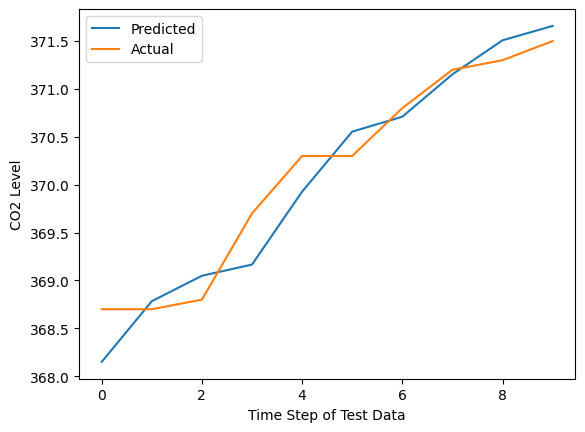

In [15]:
# Listing 6-6 Plot the final result”


X_train, X_test = data_array[:-10], data_array[-10:]
X_test_orig = X_test

fcst = []
for step in range(10):
    mod = ARIMA(X_train, order=(4,1,4))
    res = mod.fit()
    fcst.append(res.forecast(steps=1))
    X_train = np.concatenate((X_train, X_test[0:1,:]))
    X_test = X_test[1:]

plt.plot(fcst)
plt.plot(X_test_orig)
plt.legend(['Predicted', 'Actual'])
plt.ylabel('CO2 Level')
plt.xlabel('Time Step of Test Data')
plt.show()


In [61]:
# Listing 7-1 Importing the data and creating a plot”
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('~/Downloads/walmart-recruiting-store-sales-forecasting/train.csv')

data = data.groupby('Date').sum()
data.head


<bound method NDFrame.head of             Store    Dept  Weekly_Sales  IsHoliday
Date                                              
2010-02-05  65124  130557   49750740.50          0
2010-02-12  65082  131179   48336677.63       2956
2010-02-19  65610  131897   48276993.78          0
2010-02-26  65045  130161   43968571.13          0
2010-03-05  64897  129670   46871470.30          0
...           ...     ...           ...        ...
2012-09-28  65866  130785   43734899.40          0
2012-10-05  66296  132468   47566639.31          0
2012-10-12  66453  133371   46128514.25          0
2012-10-19  65630  130255   45122410.57          0
2012-10-26  65888  130739   45544116.29          0

[143 rows x 4 columns]>

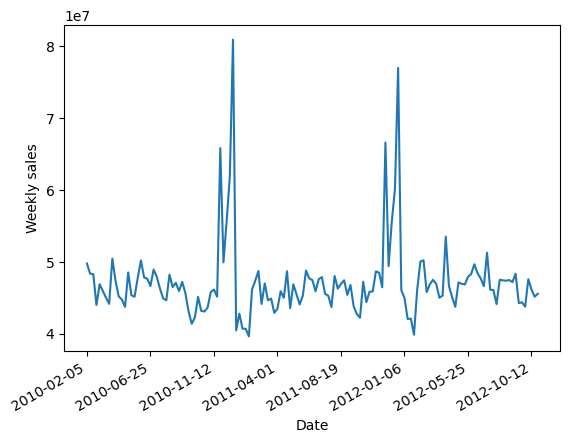

In [59]:

ax = data['Weekly_Sales'].plot()
ax.set_ylabel('Weekly sales')
plt.gcf().autofmt_xdate()
plt.show()

/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


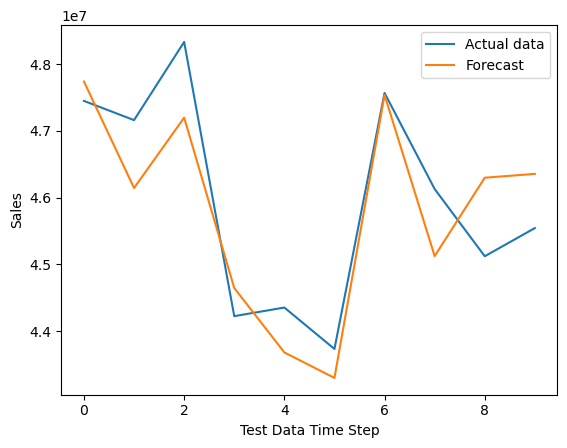

0.7309576478350681

In [74]:
# “Listing 7-2 Fitting a SARIMA(1,1,1)(1,1,1)52 model” : 
# Update: The best model is SARIMA(1,1,1)(1,1,1)52

import random
random.seed(12345)
import statsmodels.api as sm
from sklearn.metrics import r2_score
train = data['Weekly_Sales'][:-10]
test = data['Weekly_Sales'][-10:]
mod = sm.tsa.statespace.SARIMAX(data['Weekly_Sales'][:-10], order=(1,1,1), seasonal_order=(1,1,1,52))
res = mod.fit(disp=False)
fcst = res.forecast(steps=10)
plt.plot(list(test))
plt.plot(list(fcst))
plt.legend(['Actual data', 'Forecast'])
plt.ylabel('Sales')
plt.xlabel('Test Data Time Step')
plt.show()
r2_score(test, fcst)



In [69]:
# Listing 7-3Grid Search on the SARIMA model

scores = []
for p in range(2):
    for i in range(2):
        for q in range(2):
            for P in range(2):
                for D in range(2):
                    for Q in range(2):
                        try:
                            mod = sm.tsa.statespace.SARIMAX(train, order=(p,i,q), seasonal_order=(P,D,Q,52))
                            res = mod.fit(disp=False)
                            score = [p,i,q,P,D,Q,r2_score(test, res.forecast(steps=10))]
                            print(score)
                            scores.append(score)
                            del mod
                            del res
                        except:
                            print('errored')
res = pd.DataFrame(scores)
res.columns = ['p', 'i', 'q', 'P', 'D', 'Q', 'score']
res.sort_values('score')




/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/

[0, 0, 0, 0, 0, 0, -907.1066113344237]
[0, 0, 0, 0, 0, 1, -400.0926553357579]
[0, 0, 0, 0, 1, 0, 0.3708213108942816]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/

[0, 0, 0, 0, 1, 1, 0.3702845954113335]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[0, 0, 0, 1, 0, 0, 0.34214899942760657]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 0, 0, 1, 0, 1, 0.11462074662084365]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 0, 0, 1, 1, 0, 0.37049962550494653]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 0, 0, 1, 1, 1, 0.6088481476089421]
[0, 0, 1, 0, 0, 0, -833.3919833341762]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/

[0, 0, 1, 0, 0, 1, -507.00892030511847]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 0, 1, 0, 1, 0, 0.37079253060824025]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 0, 1, 0, 1, 1, 0.37036387647402225]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[0, 0, 1, 1, 0, 0, -322.36620194966173]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 0, 1, 1, 0, 1, -303.4843687847668]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 0, 1, 1, 1, 0, 0.37051998501379013]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 0, 1, 1, 1, 1, 0.6053384563841284]
[0, 1, 0, 0, 0, 0, -0.8332866985703771]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/

[0, 1, 0, 0, 0, 1, -0.15501515698710122]
[0, 1, 0, 0, 1, 0, 0.5924046391246292]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/

[0, 1, 0, 0, 1, 1, 0.6231533302862782]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 1, 0, 1, 0, 0, 0.7170897689137019]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 1, 0, 1, 0, 1, 0.6128799974668993]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 1, 0, 1, 1, 0, 0.6050986889601557]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 1, 0, 1, 1, 1, 0.7187531536068591]
[0, 1, 1, 0, 0, 0, -0.6610098806020821]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/

[0, 1, 1, 0, 0, 1, -0.10779353405328274]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 1, 1, 0, 1, 0, 0.612539539429938]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 1, 1, 0, 1, 1, 0.6521903491897678]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 1, 1, 1, 0, 0, 0.5710729436138025]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 1, 1, 1, 0, 1, 0.6498039813147485]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[0, 1, 1, 1, 1, 0, 0.6342012153730449]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[0, 1, 1, 1, 1, 1, 0.7343408630221769]
[1, 0, 0, 0, 0, 0, -0.3635490606340439]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/

[1, 0, 0, 0, 0, 1, -0.004946942655099873]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 0, 0, 0, 1, 0, 0.3708202630640346]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 0, 0, 0, 1, 1, 0.3703711125071987]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[1, 0, 0, 1, 0, 0, -0.7326950571178494]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 0, 0, 1, 0, 1, -0.7330044659507462]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 0, 0, 1, 1, 0, 0.3705349836061522]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 0, 0, 1, 1, 1, 0.6056815354251552]
[1, 0, 1, 0, 0, 0, -0.1802130067418526]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/

[1, 0, 1, 0, 0, 1, 0.3214400974268743]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 0, 1, 0, 1, 0, 0.5998125072703522]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 0, 1, 0, 1, 1, 0.345885771548444]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[1, 0, 1, 1, 0, 0, 0.7102865644072476]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 0, 1, 1, 0, 1, 0.7049959658304858]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 0, 1, 1, 1, 0, 0.3470741505049155]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 0, 1, 1, 1, 1, 0.5762233130057044]
[1, 1, 0, 0, 0, 0, -0.8465685308266193]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/

[1, 1, 0, 0, 0, 1, -0.2043837361606422]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 1, 0, 0, 1, 0, 0.6144815463176049]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 1, 0, 0, 1, 1, 0.6574396401838869]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 1, 0, 1, 0, 0, 0.524622245679327]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 1, 0, 1, 0, 1, 0.6059512380264391]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 1, 0, 1, 1, 0, 0.6392958763494154]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 1, 0, 1, 1, 1, 0.7334064072616631]
[1, 1, 1, 0, 0, 0, -0.8268994121322439]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/

[1, 1, 1, 0, 0, 1, -0.11619718597319761]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 1, 1, 0, 1, 0, 0.6056411734307128]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 1, 1, 0, 1, 1, 0.6440710233516531]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 1, 1, 1, 0, 0, 0.335362584267066]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 1, 1, 1, 0, 1, 0.3756855656691819]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


[1, 1, 1, 1, 1, 0, 0.6260660918663454]


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[1, 1, 1, 1, 1, 1, 0.7309576478350681]


,p,i,q,P,D,Q,score
0,0,0,0,0,0,0,-907.106611
8,0,0,1,0,0,0,-833.391983
9,0,0,1,0,0,1,-507.008920
1,0,0,0,0,0,1,-400.092655
12,0,0,1,1,0,0,-322.366202
...,...,...,...,...,...,...,...
20,0,1,0,1,0,0,0.717090
23,0,1,0,1,1,1,0.718753
63,1,1,1,1,1,1,0.730958
55,1,1,0,1,1,1,0.733406


In [70]:
res.sort_values('score')

,p,i,q,P,D,Q,score
0,0,0,0,0,0,0,-907.106611
8,0,0,1,0,0,0,-833.391983
9,0,0,1,0,0,1,-507.008920
1,0,0,0,0,0,1,-400.092655
12,0,0,1,1,0,0,-322.366202
...,...,...,...,...,...,...,...
20,0,1,0,1,0,0,0.717090
23,0,1,0,1,1,1,0.718753
63,1,1,1,1,1,1,0.730958
55,1,1,0,1,1,1,0.733406


In [71]:
max_score = res['score'].max()
print(max_score)


0.7343408630221769


In [72]:
# Find the index of the max score
best_idx = res['score'].idxmax()
best_row = res.loc[best_idx]  # Get the row with the max score
print("Best parameters and score:")
print(f"p: {best_row['p']}, i: {best_row['i']}, q: {best_row['q']}, P: {best_row['P']}, D: {best_row['D']}, Q: {best_row['Q']}, Score: {best_row['score']}")

Best parameters and score:
p: 0.0, i: 1.0, q: 1.0, P: 1.0, D: 1.0, Q: 1.0, Score: 0.7343408630221769


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


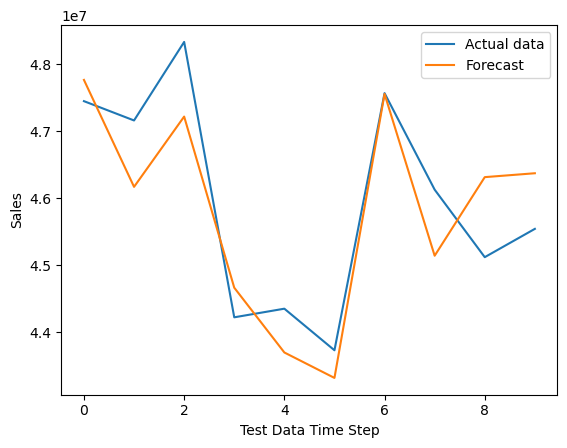

0.7343408630221769

In [73]:
# “Listing 7-2 Fitting a SARIMA(1,1,1)(1,1,1)52 model” : 
# Update: The best model is SARIMA(0,1,1)(1,1,1)52
#  from Best parameters and score:
# p: 0.0, i: 1.0, q: 1.0, P: 1.0, D: 1.0, Q: 1.0, Score: 0.7343408630221769
import random
random.seed(12345)
import statsmodels.api as sm
from sklearn.metrics import r2_score
train = data['Weekly_Sales'][:-10]
test = data['Weekly_Sales'][-10:]
mod = sm.tsa.statespace.SARIMAX(data['Weekly_Sales'][:-10], order=(0,1,1), seasonal_order=(1,1,1,52))
res = mod.fit(disp=False)
fcst = res.forecast(steps=10)
plt.plot(list(test))
plt.plot(list(fcst))
plt.legend(['Actual data', 'Forecast'])
plt.ylabel('Sales')
plt.xlabel('Test Data Time Step')
plt.show()
r2_score(test, fcst)

